## Import Required Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix

## Reading Data

In [3]:
train_data = pd.read_csv(r'data/mitbih_train.csv', header=None)
test_data = pd.read_csv(r'data/mitbih_test.csv', header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Checking for null values

In [4]:
for col in train_data.columns:
    if train_data[col].isna().sum()>0:
        print(col, train_data[col].isna().sum())
    else:
        print("No Null Values")

No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Va

## Plotting different ECG classes

In [18]:
ecg0 = train_data[train_data[187]==0].iloc[0,:187]
ecg1 = train_data[train_data[187]==1].iloc[0,:187]
ecg2 = train_data[train_data[187]==2].iloc[0,:187]
ecg3 = train_data[train_data[187]==3].iloc[0,:187]
ecg4 = train_data[train_data[187]==4].iloc[0,:187]

In [ ]:
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

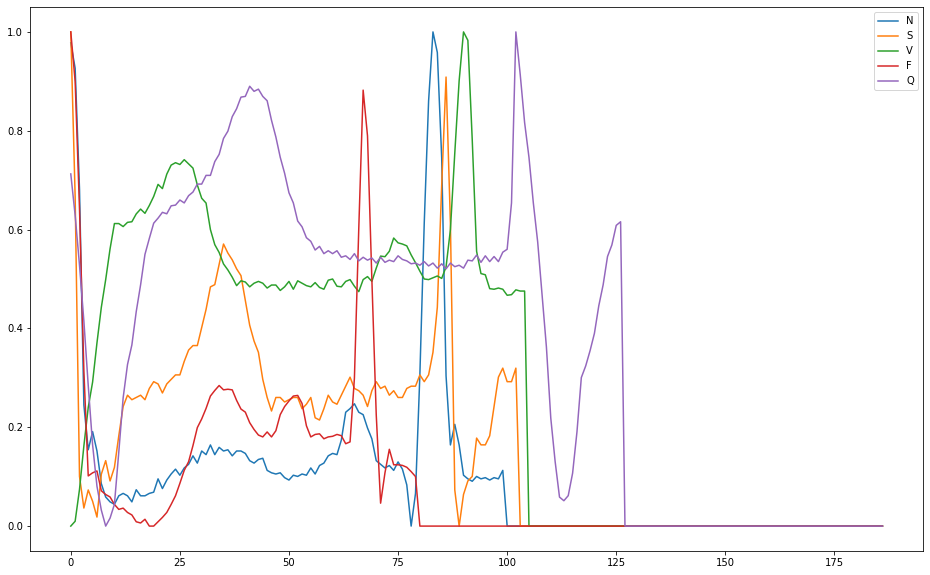

In [23]:
xx = list(range(187))
plt.figure(figsize=(16,10))
plt.plot(xx,ecg0, label='N')
plt.plot(xx,ecg1, label='S')
plt.plot(xx,ecg2, label='V')
plt.plot(xx,ecg3, label='F')
plt.plot(xx,ecg4, label='Q')
plt.legend()

## Checking whether data is balanced

<AxesSubplot:xlabel='187', ylabel='count'>

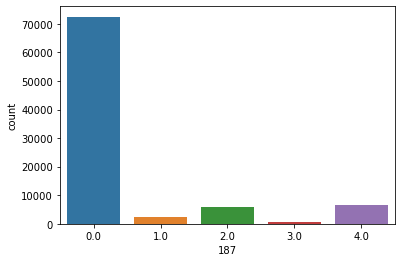

In [24]:
sns.countplot(train_data[187])

### The data is imbalanced so we need to balance it

In [25]:
df_0 = (train_data[train_data[187]==0]).sample(n=10000,random_state=42)
df_1 = resample(train_data[train_data[187]==1],replace=True,n_samples=10000,random_state=125)
df_2 = resample(train_data[train_data[187]==2],replace=True,n_samples=10000,random_state=125)
df_3 = resample(train_data[train_data[187]==3],replace=True,n_samples=10000,random_state=125)
df_4 = resample(train_data[train_data[187]==4],replace=True,n_samples=10000,random_state=125)

In [26]:
bal_data = pd.concat([df_0,df_1,df_2,df_3,df_4])

<AxesSubplot:xlabel='187', ylabel='count'>

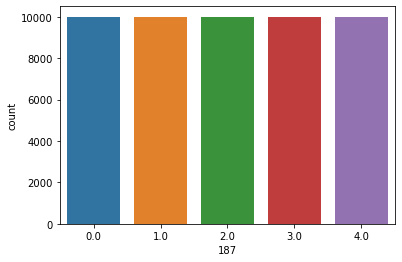

In [27]:
sns.countplot(bal_data[187])

# Applying Random Forest with PCA

## Splitting data in features and labels

In [73]:
x_train = bal_data.drop(columns = [187])
y_train = bal_data[187]
x_test = test_data.drop(columns = [187])
y_test = test_data[187]

## Plotting graph of dimensions vs variance explained

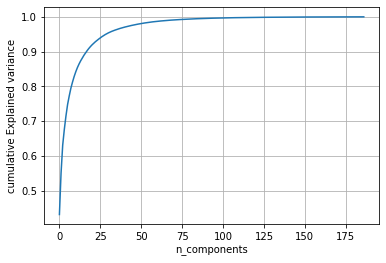

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
pca.n_components = 187
pca_data = pca.fit_transform(x_train)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
plt.plot(cum_var_explained)
plt.xlabel('n_components')
plt.ylabel('cumulative Explained variance')
plt.grid()
plt.show()

In [30]:
n_components = 75
pca = PCA(n_components=n_components).fit(x_train)
x_train_pca = pca.transform(x_train)
cum_exp_var = pca.explained_variance_ratio_.sum()
print("Variance Explained:", cum_exp_var)
x_test_pca = pca.transform(x_test)

Variance Explained: 0.9922816947729484


## Traning a Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=False, verbose=False)
rfc.fit(x_train_pca, y_train)

RandomForestClassifier(random_state=False, verbose=False)

In [61]:
y_train_pred = rfc.predict(x_train_pca)
y_test_pred = rfc.predict(x_test_pca)

## Evaluating Model Performance

In [74]:
print("Training Performance Report: ", classification_report(y_train_pred, y_train))

Training Performance Report:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10000
         1.0       1.00      1.00      1.00     10000
         2.0       1.00      1.00      1.00     10000
         3.0       1.00      1.00      1.00     10000
         4.0       1.00      1.00      1.00     10000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



In [75]:
print("Training Performance Report: ", classification_report(y_test_pred, y_test))

Training Performance Report:                precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     18043
         1.0       0.72      0.75      0.73       530
         2.0       0.92      0.85      0.88      1561
         3.0       0.74      0.64      0.69       187
         4.0       0.96      0.98      0.97      1571

    accuracy                           0.96     21892
   macro avg       0.86      0.84      0.85     21892
weighted avg       0.96      0.96      0.96     21892



In [76]:
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.964507582678604


## Plotting confusion matrix

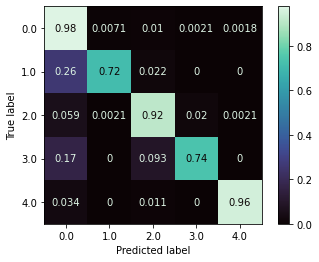

In [77]:
plot_confusion_matrix(rfc, x_test_pca, y_test, cmap='mako', normalize='true')

# Applying Convolutional Neural Networks

In [36]:
import keras
import numpy as np
from keras.layers import Input, Dense, Conv1D, MaxPool1D, Dropout, BatchNormalization, Flatten

## Data Preprocessing

In [81]:
x_train = train_data.iloc[:,:187].values.reshape(train_data.shape[0], 187, 1)
y_train = keras.utils.to_categorical(train_data[187])
print(x_train.shape, y_train.shape)
x_test = test_data.iloc[:,:187].values.reshape(test_data.shape[0], 187, 1)
y_test = keras.utils.to_categorical(test_data[187])
print(x_test.shape, y_test.shape)

(87554, 187, 1) (87554, 5)
(21892, 187, 1) (21892, 5)


## Defining our model

In [107]:
model = keras.Sequential()
model.add(Input(shape=(x_train.shape[1],1)))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPool1D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(64, 11, activation='relu'))
model.add(MaxPool1D(2))
model.add(BatchNormalization())
model.add(Conv1D(64, 11, activation='relu'))
model.add(MaxPool1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 181, 32)           256       
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 90, 32)            0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 90, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 90, 32)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 80, 64)            22592     
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 40, 64)            0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 40, 64)           

In [108]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training Our Model

In [109]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
2737/2737 [==============================] - 54s 20ms/step - loss: 0.1532 - accuracy: 0.9579 - val_loss: 0.0916 - val_accuracy: 0.9752
Epoch 2/15
2737/2737 [==============================] - 58s 21ms/step - loss: 0.0857 - accuracy: 0.9757 - val_loss: 0.0731 - val_accuracy: 0.9799
Epoch 3/15
2737/2737 [==============================] - 57s 21ms/step - loss: 0.0663 - accuracy: 0.9809 - val_loss: 0.0772 - val_accuracy: 0.9785
Epoch 4/15
2737/2737 [==============================] - 59s 21ms/step - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.0822 - val_accuracy: 0.9790
Epoch 5/15
2737/2737 [==============================] - 61s 22ms/step - loss: 0.0485 - accuracy: 0.9852 - val_loss: 0.0759 - val_accuracy: 0.9808
Epoch 6/15
2737/2737 [==============================] - 60s 22ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0708 - val_accuracy: 0.9810
Epoch 7/15
2737/2737 [==============================] - 60s 22ms/step - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.0776 -

## Plotting Accuracy vs Epoch

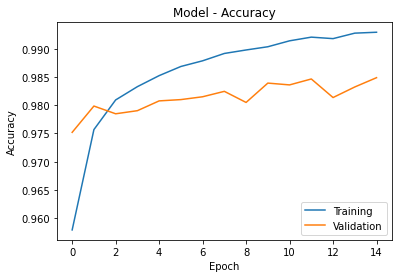

In [110]:
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

## plotting Loss vs Epoch

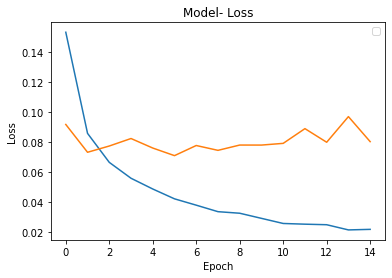

In [111]:
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Evaluating Model Performance

In [112]:
y_train1 = np.argmax(y_train, axis=1)
y_test1 = np.argmax(y_test, axis=1)
y_pred_train = np.argmax(model.predict(x_train), axis=1)
y_pred_test = np.argmax(model.predict(x_test), axis=1)

In [113]:
print("Training Performance Report: ", classification_report(y_pred_train, y_train1))

Training Performance Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     72673
           1       0.91      0.98      0.94      2078
           2       0.99      0.98      0.99      5822
           3       0.84      0.94      0.89       576
           4       1.00      1.00      1.00      6405

    accuracy                           0.99     87554
   macro avg       0.95      0.98      0.96     87554
weighted avg       0.99      0.99      0.99     87554



In [118]:
print("Training Performance Report: ", classification_report(y_pred_test, y_test1))

Training Performance Report:                precision    recall  f1-score   support

           0       1.00      0.99      0.99     18235
           1       0.79      0.91      0.85       480
           2       0.96      0.96      0.96      1442
           3       0.75      0.82      0.78       149
           4       0.98      0.99      0.99      1586

    accuracy                           0.98     21892
   macro avg       0.89      0.93      0.91     21892
weighted avg       0.99      0.98      0.99     21892



In [119]:
print("Test Accuracy:", accuracy_score(y_pred_test, y_test1))

Test Accuracy: 0.9848803215786589


## Plotting Confusion Matrix

<AxesSubplot:>

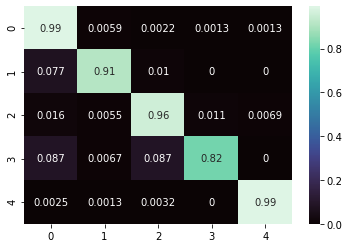

In [120]:
cnf_matrix = confusion_matrix(y_pred_test, y_test1, normalize='true')
sns.heatmap(cnf_matrix, annot=True, cmap='mako')

In [5]:
install nbconvert[webpdf]

SyntaxError: invalid syntax (<ipython-input-5-ccef6ccb1762>, line 1)